In [4]:
import os
import numpy as np
import pandas as pd

# Replace with the actual absolute path to your file
file_path = "/content/Social_Network_Ads.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [6]:
dataset = dataset.iloc[:,1:]
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


In [7]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24 , stratify=y)

*MultiLayer* perceptron model (DNN/ANN)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense



Case 1: Bulding Model without using feature scaling

In [10]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=100,verbose=1,validation_data=(x_test,y_test))



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.4712 - loss: 1932.0724 - val_accuracy: 0.6375 - val_loss: 263.8372
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4390 - loss: 517.2872 - val_accuracy: 0.6375 - val_loss: 535.0157
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 380.1197 - val_accuracy: 0.6375 - val_loss: 559.1848
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6025 - loss: 492.7610 - val_accuracy: 0.6375 - val_loss: 74.5056
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6293 - loss: 193.9737 - val_accuracy: 0.6375 - val_loss: 22.2352
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6312 - loss: 67.8469 - val_accuracy: 0.6375 - val_loss: 102.9138
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5222 - loss: 111.6248 - val_accuracy: 0.3625 - val_loss: 79.4694
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5618 - loss: 159.275

Case 2 : Building model with feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
 model1 = Sequential()
 model1.add(Dense(128,activation='relu',input_dim=x_train.shape[1] , kernel_initializer='he_normal'))
 model1.add(Dense(128,activation='relu'))
 model1.add(Dense(1,activation='sigmoid'))
 model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,epochs=100,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9221 - loss: 0.1998 - val_accuracy: 0.9250 - val_loss: 0.2084
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9149 - loss: 0.1758 - val_accuracy: 0.9250 - val_loss: 0.2132
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9357 - loss: 0.1567 - val_accuracy: 0.9250 - val_loss: 0.2087
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.1816 - val_accuracy: 0.9000 - val_loss: 0.2051
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9336 - loss: 0.1560 - val_accuracy: 0.9250 - val_loss: 0.2162
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9177 - loss: 0.1932 - val_accuracy: 0.9250 - val_loss: 0.2082
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9334 - loss: 0.1583 - val_accuracy: 0.9250 - val_loss: 0.2007
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.1695 - val_accuracy: 0.9125 - 

In [17]:
model1.get_weights()

[array([[-4.35042769e-01, -1.55267668e+00,  3.90982777e-01,
         -2.45013937e-01, -6.44319430e-02,  1.17617464e+00,
          1.49438250e+00,  6.94339037e-01, -9.93186057e-01,
         -8.81537974e-01,  2.07977057e-01,  1.27626634e+00,
          1.01452410e+00, -7.26604044e-01, -4.18855578e-01,
          1.23653078e+00,  5.42639792e-01, -1.24564397e+00,
          2.88795561e-01, -8.94964516e-01, -2.53866196e-01,
          5.09165168e-01,  2.33825389e-03,  1.17142248e+00,
         -4.98367667e-01,  8.97197366e-01, -1.67309737e+00,
         -8.75652015e-01, -4.54947084e-01,  1.44551516e+00,
          1.04332411e+00,  7.56326139e-01,  9.76285696e-01,
          1.18578231e+00, -2.03968510e-01, -1.46072888e+00,
         -2.64524311e-01,  1.86136246e-01, -1.20048833e+00,
          5.00389755e-01, -1.07020247e+00, -2.61731565e-01,
         -8.76493081e-02,  4.51807052e-01, -1.88039660e-01,
         -4.47366804e-01,  7.45118320e-01,  6.89009011e-01,
          4.26872343e-01, -9.81340110e-0

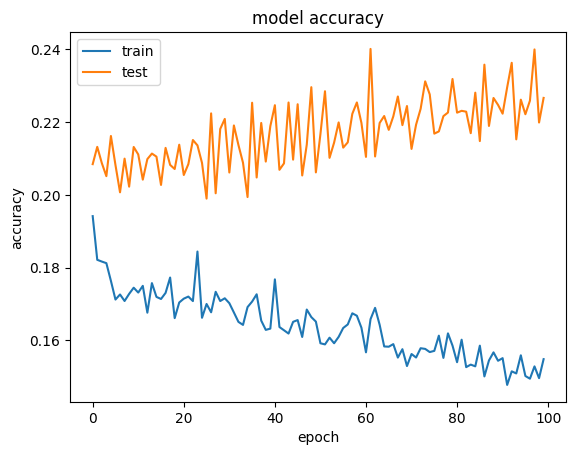

In [22]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

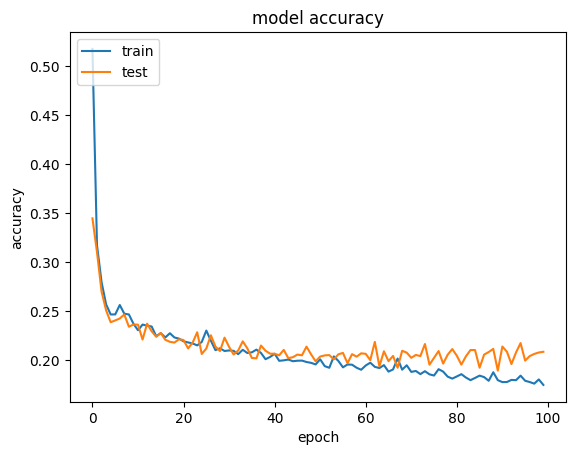

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Regularization


In [30]:
 model2 = Sequential()
 model2.add(Dense(128,activation='relu',input_dim=x_train.shape[1] , kernel_initializer='he_normal' , kernel_regularizer = keras.regularizers.l1(0.001)))
 model2.add(Dense(128,activation='relu' , kernel_regularizer = keras.regularizers.l1(0.001)))
 model2.add(Dense(1,activation='sigmoid'))
 model2.summary()



model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_train,y_train,epochs=100,verbose=1,validation_data=(x_test,y_test))

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.7268 - loss: 2.0205 - val_accuracy: 0.8250 - val_loss: 1.7997
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8748 - loss: 1.7569 - val_accuracy: 0.8875 - val_loss: 1.6789
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 1.6470 - val_accuracy: 0.8875 - val_loss: 1.5897
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8797 - loss: 1.6150 - val_accuracy: 0.9125 - val_loss: 1.5101
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9071 - loss: 1.5056 - val_accuracy: 0.9000 - val_loss: 1.4394
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9230 - loss: 1.4140 - val_accuracy: 0.9125 - val_loss: 1.3809
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9253 - loss: 1.3201 - val_accuracy: 0.9125 - val_loss: 1.3113
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 1.2717 - val_accuracy: 0.9125 -

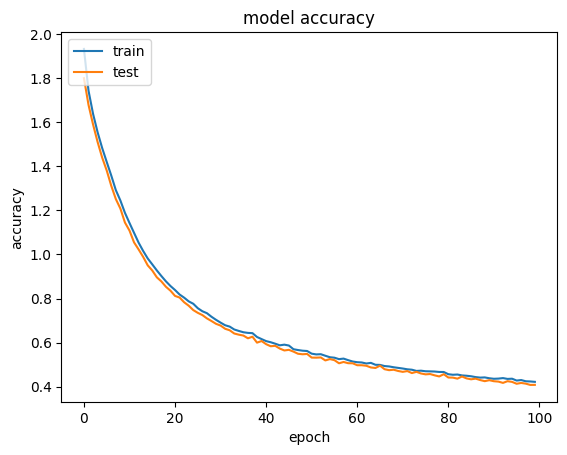

In [32]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()